In [1]:
# data analysis and wrangling
import numpy as np
import pandas as pd
import json

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold, StratifiedKFold

import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier

import tensorflow as tf

from tensorflow.keras import datasets, layers, models

# ignore Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
train_df = pd.read_csv("preprocessed_train.csv", encoding='euc-kr')

In [3]:
train_df.head()

,분석데이터,label,numstrings,avlength,printables,entropy,paths,urls,registry,MZ,...,dist_86,dist_87,dist_88,dist_89,dist_90,dist_91,dist_92,dist_93,dist_94,dist_95
0,1,1,144,12.298611,1771,5.356616,0,0,0,1,...,10,4,10,9,4,0,1,0,0,0
1,2,1,804,9.580846,7703,6.063542,0,0,0,6,...,43,121,84,78,47,36,40,45,27,36
2,3,0,2205,12.736054,28083,6.107050,9,0,0,6,...,326,268,239,286,199,148,154,37,48,36
3,4,0,2602,10.288240,26770,5.373013,8,0,0,1,...,336,230,206,245,76,0,26,702,1,5
4,5,1,8980,23.252339,208806,5.775223,0,28,16,3,...,731,882,1171,1010,322,64,327,84,75,244


In [4]:
train_df.dtypes

분석데이터           int64
label           int64
numstrings      int64
avlength      float64
printables      int64
               ...   
dist_91         int64
dist_92         int64
dist_93         int64
dist_94         int64
dist_95         int64
Length: 618, dtype: object

In [5]:
train_df2 = train_df.drop(columns=['분석데이터'], axis=1)

In [6]:
train_df_x = train_df2.drop(['label'], axis=1)

In [7]:
train_df_y = train_df2['label']

In [8]:
train_df_x = train_df.drop(['분석데이터','label'], axis=1)
train_df_y = train_df['label']
train_df_y = train_df_y.astype('int')

In [9]:
x_train, x_test, y_train, y_test = train_test_split(train_df_x, train_df_y, test_size=0.2, random_state=42, stratify=train_df_y)

In [10]:
x_train

,numstrings,avlength,printables,entropy,paths,urls,registry,MZ,a_0,a_1,...,dist_86,dist_87,dist_88,dist_89,dist_90,dist_91,dist_92,dist_93,dist_94,dist_95
3042,1160,13.968103,16203,5.592541,0,0,0,2,390735,29870,...,93,130,121,103,9,2,19,2,5,18
688,7256,6.037486,43808,6.565055,0,16,0,17,1131891,2778,...,486,477,451,428,446,449,415,401,434,419
2401,4,139.500000,558,3.311878,0,0,0,1,175208,9429,...,0,0,0,0,0,0,0,0,0,0
7919,30385,5.665756,172154,6.583076,0,12,0,112,565634,151579,...,1801,1812,1644,1829,1764,1606,1685,1709,1707,1707
5888,582,16.383162,9535,5.765152,0,1,0,1,80061,4706,...,69,55,89,176,48,1,0,12,111,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2385,12946,22.648926,293213,6.212143,0,93,0,26,24649,2051,...,2249,2223,3324,2459,1424,1420,1623,1453,1248,671
5118,6790,206.887923,1404769,5.018292,0,9,0,11,50303,42452,...,21705,19933,27071,31742,74191,67,194,101,76,66
3563,542,20.575646,11152,5.279839,11,0,0,2,4703,1493,...,75,47,79,70,10,8,4,7,1,1
5511,3468,11.835928,41047,6.048495,0,188,0,32,25817,549,...,532,261,288,290,151,129,115,135,104,114


In [11]:
x_test

,numstrings,avlength,printables,entropy,paths,urls,registry,MZ,a_0,a_1,...,dist_86,dist_87,dist_88,dist_89,dist_90,dist_91,dist_92,dist_93,dist_94,dist_95
4856,2016,13.085813,26381,6.024467,1,14,0,3,18560,416,...,133,143,189,164,56,29,105,25,38,33
488,4,43.250000,173,4.148725,0,0,0,1,349327,2935,...,1,1,0,0,0,0,0,0,0,0
7193,3,60.333333,181,3.884033,0,0,0,1,3058,50,...,0,0,0,0,0,0,0,0,0,0
9317,3446,18.289611,63026,5.796207,3,94,2,22,12583,509,...,410,625,388,542,83,15,201,24,347,45
72,1491,10.094567,15051,5.932281,0,0,0,1,82020,13439,...,178,45,121,58,21,27,56,37,22,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5044,149216,5.882171,877714,6.579395,1,1,0,501,23524,429,...,9027,8845,8741,9247,8740,8855,9306,8700,9056,9146
9504,264,10.359848,2735,6.015467,0,0,0,1,4825,95,...,14,9,26,27,5,3,15,4,7,3
3437,2757,9.026478,24886,5.759953,4,0,0,1,19979,1386,...,261,139,409,474,86,36,417,129,150,346
5854,5609,18.947049,106274,6.230731,4,64,5,12,7429,463,...,845,1178,1107,989,513,224,286,225,166,246


In [12]:
y_train

3042    0
688     1
2401    0
7919    1
5888    0
       ..
2385    1
5118    0
3563    1
5511    0
1212    0
Name: label, Length: 8000, dtype: int32

In [13]:
y_test

4856    1
488     1
7193    0
9317    1
72      0
       ..
5044    1
9504    0
3437    1
5854    1
3981    1
Name: label, Length: 2000, dtype: int32

In [14]:
y_train.dtypes

dtype('int32')

In [15]:
#x_train.astype('float')

In [16]:
xgb = XGBClassifier(silent=False,
                    n_estimators = 1000,
                    booster='gbtree',
                    tree_method='gpu_hist',
                    preidctor= 'gpu_predictor',
                    scale_pos_weight=1,
                    learning_rate=0.01,
                    objective='binary:logistic',
                    max_depth = 10,
                    subsample = 0.8,
                    colsample_bytree = 0.8,
                    min_child_weight = 1,
                    gamma = 0.5, seed=42)

In [17]:
xgb.fit(x_train, y_train)

[20:33:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "preidctor", "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:33:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0.5, gpu_id=0,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=1000, n_jobs=12, num_parallel_tree=1,
              preidctor='gpu_predictor', random_state=42, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=42, silent=False,
              subsample=0.8, tree_method='gpu_hist', validate_parameters=1,
              verbosity=None)

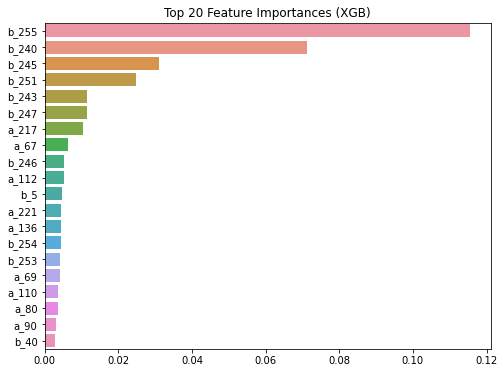

In [18]:
ft_importance_values = xgb.feature_importances_

ft_series = pd.Series(ft_importance_values, index = x_train.columns)
ft_top20 = ft_series.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Top 20 Feature Importances (XGB)')
sns.barplot(x=ft_top20, y=ft_top20.index)
plt.show()

In [19]:
data_copy = train_df2.copy()

In [20]:
def remove_outlier_0(df, column):
    fraud_column_data = df[df['label']==0][column]
    quantile_25 = np.percentile(fraud_column_data.values, 25)
    quantile_75 = np.percentile(fraud_column_data.values, 75)
    
    IQR = quantile_75 - quantile_25
    IQR_weight = IQR * 1.5
    
    lowest = quantile_25 - IQR_weight
    highest = quantile_75 + IQR_weight
    
    outlier_idx = fraud_column_data[ (fraud_column_data < lowest) | (fraud_column_data > highest) ].index
    print(len(outlier_idx))
    df.drop(outlier_idx, axis=0, inplace=True)
    print(df.shape)
    return df

In [21]:
def remove_outlier_1(df, column):
    fraud_column_data = df[df['label']==1][column]
    quantile_25 = np.percentile(fraud_column_data.values, 25)
    quantile_75 = np.percentile(fraud_column_data.values, 75)
    
    IQR = quantile_75 - quantile_25
    IQR_weight = IQR * 1.5
    
    lowest = quantile_25 - IQR_weight
    highest = quantile_75 + IQR_weight
    
    outlier_idx = fraud_column_data[ (fraud_column_data < lowest) | (fraud_column_data > highest) ].index
    print(len(outlier_idx))
    df.drop(outlier_idx, axis=0, inplace=True)
    print(df.shape)
    return df

In [22]:
data_copy = remove_outlier_0(data_copy, 'b_255')

972
(9028, 617)


In [23]:
data_copy_x = data_copy.drop(columns=['label'], axis=1)

In [24]:
data_copy_y = data_copy['label']

In [25]:
x_train, x_test, y_train, y_test = train_test_split(data_copy_x, data_copy_y, test_size=0.2, random_state=42)

57/57 - 0s - loss: 2.2932 - accuracy: 0.7791
0.7790697813034058

b_240의 이상치도 제거하고 시험해보기

In [26]:
data_copy = remove_outlier_0(data_copy, 'b_240')

796
(8232, 617)


In [27]:
data_copy = remove_outlier_1(data_copy, 'b_240')

788
(7444, 617)


In [28]:
data_copy_x = data_copy.drop(columns=['label'], axis=1)

In [29]:
data_copy_y = data_copy['label']

In [30]:
x_train, x_test, y_train, y_test = train_test_split(data_copy_x, data_copy_y, test_size=0.2, random_state=42)

MinMaxScaler

In [31]:
from sklearn.preprocessing import MinMaxScaler

In [32]:
transformer = MinMaxScaler() #transformer = MinMaxScaler(feature_range=(0, 1))
transformer.fit(x_train) #MinMaxScaler 모델에 x_train_df 데이터 적용 (최소값, 최대값 계산)
x_train = transformer.transform(x_train)

transformer.fit(x_test) #MinMaxScaler 모델에 x_train_df 데이터 적용 (최소값, 최대값 계산)
x_test = transformer.transform(x_test)

In [33]:
x_train.shape

(5955, 616)

In [34]:
x3 = np.zeros((5955,22,28))
x4 = np.zeros((5955,22,28,1))
for i in range(5955):
    x3[i] = x_train[i].reshape((22,28))
    for j in range(22):
        for k in range(28):
            x4[i][j][k][0] = x3[i][j][k]

In [35]:
x_train = x4

In [36]:
x_train.shape

(5955, 22, 28, 1)

In [37]:
y_train = y_train.to_numpy()

In [38]:
x_test.shape

(1489, 616)

In [39]:
xt3 = np.zeros((1489,22,28))
xt4 = np.zeros((1489,22,28,1))
for i in range(1489):
    xt3[i] = x_test[i].reshape((22,28))
    for j in range(22):
        for k in range(28):
            xt4[i][j][k][0] = xt3[i][j][k]

In [40]:
x_test = xt4

In [41]:
x_test.shape

(1489, 22, 28, 1)

In [42]:
# 합성곱 층 만들기

model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(22, 28, 1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.25))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.25))
model.add(layers.Conv2D(64, (3,3), activation='relu'))

In [43]:
# 마지막에 Dense 층 추가하기
model.add(layers.Dropout(0.25))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(2, activation='softmax'))

In [44]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 20, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 10, 13, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 10, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 11, 64)         18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 5, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 4, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 2, 3, 64)          3

In [45]:
# 모델 컴파일과 훈련하기
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=100)

Epoch 1/100
187/187 [==============================] - 2s 4ms/step - loss: 0.4861 - accuracy: 0.7422
Epoch 2/100
187/187 [==============================] - 1s 4ms/step - loss: 0.3791 - accuracy: 0.8242
Epoch 3/100
187/187 [==============================] - 1s 4ms/step - loss: 0.3417 - accuracy: 0.8490
Epoch 4/100
187/187 [==============================] - 1s 4ms/step - loss: 0.3194 - accuracy: 0.8591
Epoch 5/100
187/187 [==============================] - 1s 4ms/step - loss: 0.3031 - accuracy: 0.8675
Epoch 6/100
187/187 [==============================] - 1s 4ms/step - loss: 0.2942 - accuracy: 0.8729
Epoch 7/100
187/187 [==============================] - 1s 4ms/step - loss: 0.2754 - accuracy: 0.8835
Epoch 8/100
187/187 [==============================] - 1s 4ms/step - loss: 0.2660 - accuracy: 0.8902
Epoch 9/100
187/187 [==============================] - 1s 4ms/step - loss: 0.2589 - accuracy: 0.8945
Epoch 10/100
187/187 [==============================] - 1s 4ms/step - loss: 0.2551 - accura

187/187 [==============================] - 1s 4ms/step - loss: 0.1905 - accuracy: 0.9243
Epoch 82/100
187/187 [==============================] - 1s 3ms/step - loss: 0.1521 - accuracy: 0.9414
Epoch 83/100
187/187 [==============================] - 1s 3ms/step - loss: 0.1367 - accuracy: 0.9493
Epoch 84/100
187/187 [==============================] - 1s 3ms/step - loss: 0.1368 - accuracy: 0.9484
Epoch 85/100
187/187 [==============================] - 1s 3ms/step - loss: 0.1355 - accuracy: 0.9488
Epoch 86/100
187/187 [==============================] - 1s 4ms/step - loss: 0.1365 - accuracy: 0.9523
Epoch 87/100
187/187 [==============================] - 1s 4ms/step - loss: 0.1328 - accuracy: 0.9513
Epoch 88/100
187/187 [==============================] - 1s 4ms/step - loss: 0.1387 - accuracy: 0.9488
Epoch 89/100
187/187 [==============================] - 1s 3ms/step - loss: 0.1356 - accuracy: 0.9500
Epoch 90/100
187/187 [==============================] - 1s 4ms/step - loss: 0.1329 - accuracy: 

In [46]:
# 모델 평가
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(test_acc)

47/47 - 0s - loss: 0.3591 - accuracy: 0.9167
0.9167226552963257
